# Lecture 4 Notebook 6: Creating Subplots for Comparisons

**Learning Objectives:**
- Understand why subplots are useful for data comparison
- Create side-by-side subplots (1 row, multiple columns)
- Create stacked subplots (multiple rows, 1 column)
- Create grid layouts (multiple rows and columns)
- Use shared axes for better comparisons
- Master the `axes.flatten()` technique for easier plotting

---

## 1. Introduction: Why Use Subplots?

When analyzing biological data, we often need to compare multiple variables or conditions. **Subplots** allow us to create multiple plots in a single figure.

**Benefits:**
- 👁️ **Visual Comparison**: Compare distributions side-by-side without overlapping
- 📄 **Publication Ready**: Multi-panel figures are standard in scientific papers
- 🔬 **Tell a Story**: Show multiple aspects of your data in one figure

**Real-world example:** Instead of overlaying 4 gene expression histograms (which gets messy), we can create 4 separate panels in one figure!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load Gene Expression Data

Let's load our familiar DepMap dataset:

In [3]:
# Load the gene expression data
url = "https://zenodo.org/records/17377786/files/expression_filtered.csv?download=1"
gene_df = pd.read_csv(url)

print(f"Dataset shape: {gene_df.shape}")
gene_df.head()

Dataset shape: (89, 17130)


,model_id,cell_line_name,stripped_cell_line_name,oncotree_lineage,oncotree_primary_disease,oncotree_subtype,oncotree_code,ccle_name,depmap_model_type,A1BG,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,ACH-002401,21MT-2,21MT2,Breast,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,IDC,21MT2_BREAST,IDC,0.646696,...,4.290528,3.304012,1.321368,2.475321,2.634805,1.432083,2.173767,5.442602,2.618363,3.881381
1,ACH-002399,21NT,21NT,Breast,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,IDC,21NT_BREAST,IDC,0.597972,...,4.659108,5.637216,2.059359,3.368145,3.210284,1.628363,2.892195,5.471226,2.946576,4.243463
2,ACH-001683,ACC-3133,UACC3133,Breast,Invasive Breast Carcinoma,Breast Invasive Lobular Carcinoma,ILC,UACC3133_BREAST,ILC,3.621360,...,5.147168,6.341126,1.470006,2.652376,2.958056,1.904889,2.652636,6.703710,2.667631,2.778488
3,ACH-000557,AML-193,AML193,Myeloid,Acute Myeloid Leukemia,AML with Myelodysplasia-Related Changes,AMLMRC,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AMLMRC,3.333567,...,4.126725,7.424527,0.773312,1.892076,4.531631,0.055397,1.880827,7.356346,2.775413,3.967814
4,ACH-000248,AU565,AU565,Breast,Invasive Breast Carcinoma,Invasive Breast Carcinoma,BRCA,AU565_BREAST,BRCA,2.171889,...,4.618109,7.147286,0.656105,2.342458,3.317148,0.012660,2.992381,7.515187,3.835247,4.026357


---

## 3. Starting Simple: Single Plot Review

Before we create subplots, let's review creating a single plot with the fig, ax API:

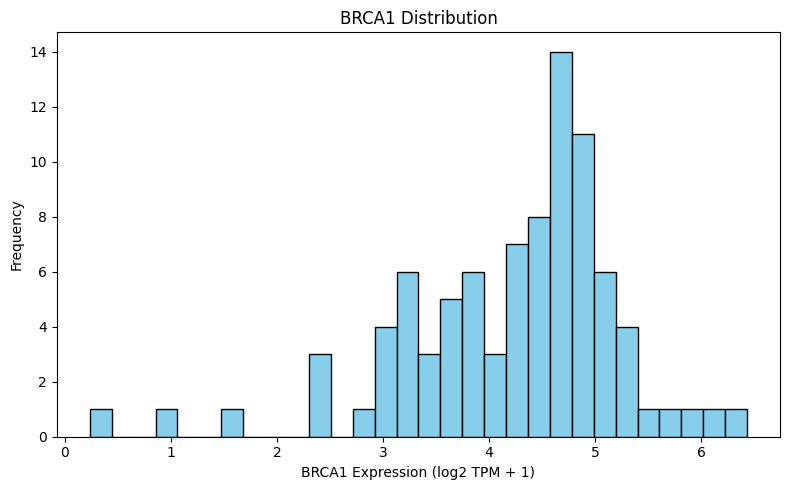

In [4]:
# Single plot - what we already know
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(gene_df['BRCA1'], bins=30, color='skyblue', edgecolor='black')
ax.set_xlabel('BRCA1 Expression (log2 TPM + 1)')
ax.set_ylabel('Frequency')
ax.set_title('BRCA1 Distribution')
plt.tight_layout()
plt.show()

**Key points:**
- `fig, ax = plt.subplots()` creates one figure with one axes
- We plot on `ax`
- `plt.tight_layout()` adjusts spacing to prevent overlap

Now let's learn how to create **multiple** axes in one figure!

---

## 4. Side-by-Side Subplots (1 row, 2 columns)

Let's create two plots side-by-side to compare BRCA1 and TP53:

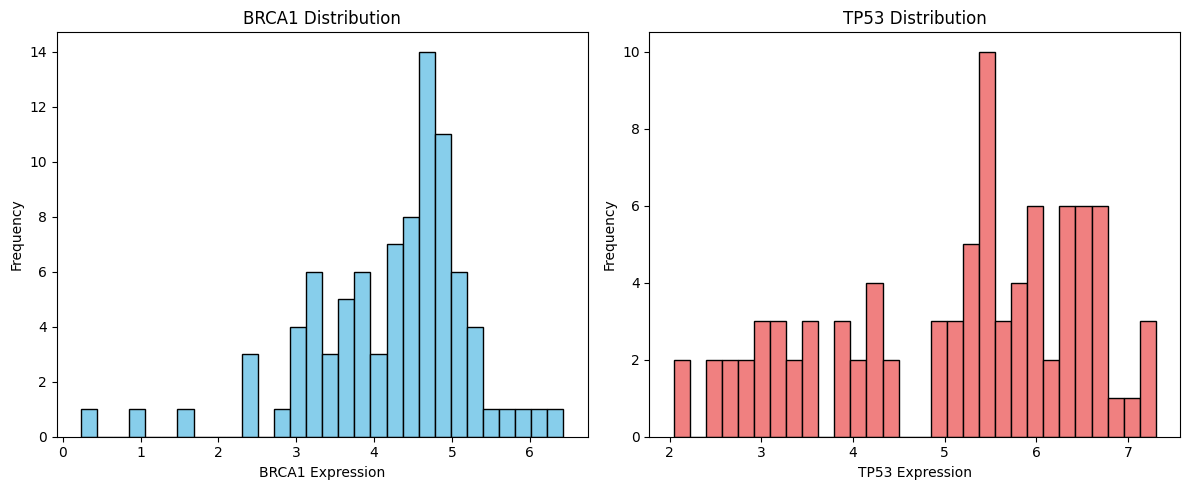

In [5]:
# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left subplot (axes[0]): BRCA1
axes[0].hist(gene_df['BRCA1'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('BRCA1 Expression')
axes[0].set_ylabel('Frequency')
axes[0].set_title('BRCA1 Distribution')

# Right subplot (axes[1]): TP53
axes[1].hist(gene_df['TP53'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('TP53 Expression')
axes[1].set_ylabel('Frequency')
axes[1].set_title('TP53 Distribution')

plt.tight_layout()  # Prevent overlap!
plt.show()

**What changed?**
- `plt.subplots(1, 2)`: Creates **1 row** and **2 columns** of plots
- `axes` is now an **array** with 2 elements
- `axes[0]` = left plot, `axes[1]` = right plot
- `figsize=(12, 5)`: Made it wider to accommodate both plots
- `plt.tight_layout()`: **Always use this!** It prevents labels from overlapping

**Result:** We can now directly compare the two distributions without overlapping bars!

### 📊 Exercise 1: Three Genes Side-by-Side

Create 3 subplots side-by-side (1 row, 3 columns) showing histograms of BRCA1, TP53, and MYC.

**Hints:**
- Use `plt.subplots(1, 3, figsize=(15, 5))`
- Access plots with `axes[0]`, `axes[1]`, `axes[2]`
- Use different colors for each gene

In [ ]:
# Your code here:


---

## 5. Stacked Subplots (2 rows, 1 column)

Sometimes it's better to stack plots vertically. This is especially useful when:
- The x-axes represent the same variable (easier to compare values)
- You want to align plots for visual comparison
- You have limited horizontal space

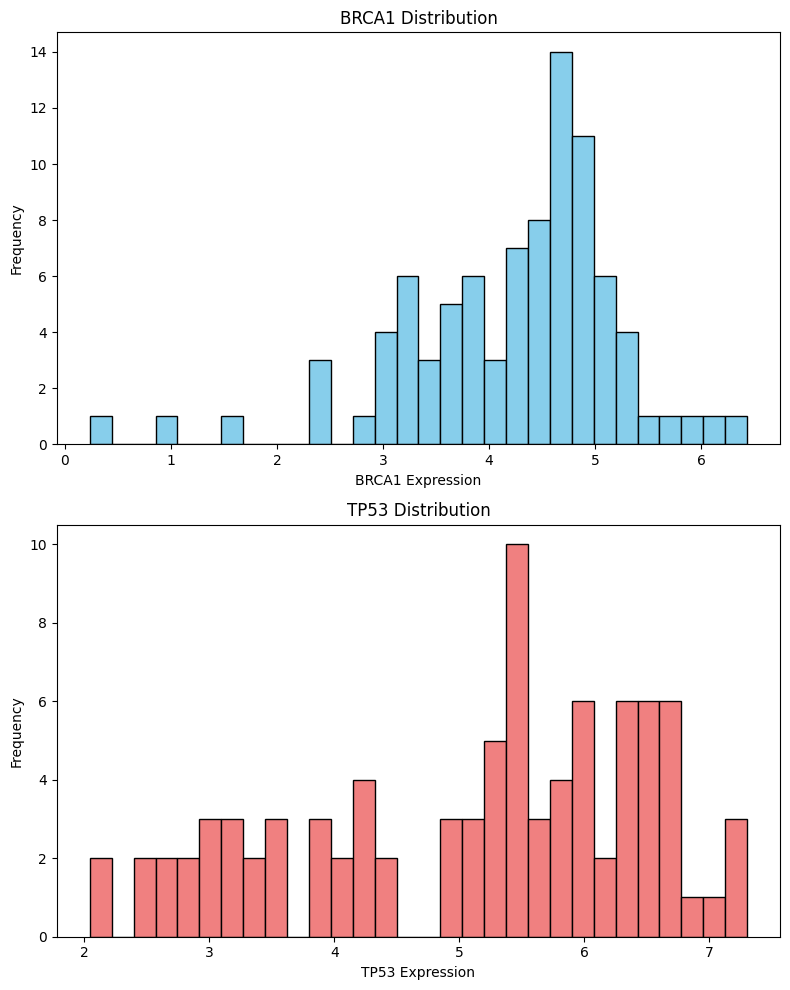

In [6]:
# Create 2 rows, 1 column of subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Top subplot (axes[0]): BRCA1
axes[0].hist(gene_df['BRCA1'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('BRCA1 Expression')
axes[0].set_ylabel('Frequency')
axes[0].set_title('BRCA1 Distribution')

# Bottom subplot (axes[1]): TP53
axes[1].hist(gene_df['TP53'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('TP53 Expression')
axes[1].set_ylabel('Frequency')
axes[1].set_title('TP53 Distribution')

plt.tight_layout()
plt.show()

**What changed?**
- `plt.subplots(2, 1)`: Creates **2 rows** and **1 column**
- `axes[0]` = top plot, `axes[1]` = bottom plot
- `figsize=(8, 10)`: Made it taller instead of wider

**Notice:** The x-axes are aligned, making it easy to compare expression values across genes!

### 📊 Exercise 2: Density Plots Stacked

Create 3 stacked subplots (3 rows, 1 column) showing density plots (not histograms) of BRCA1, TP53, and MYC.

**Hints:**
- Use `plt.subplots(3, 1, figsize=(8, 12))`
- Use `.plot(kind='density', ax=axes[i])` for each gene
- Remember to set labels and titles!

In [ ]:
# Your code here:


---

## 6. Grid Layout (2×2 for Four Genes)

What if we want to compare 4 or more genes? We can create a **grid** of subplots!

This is where things get interesting - we need to use **2D indexing**.

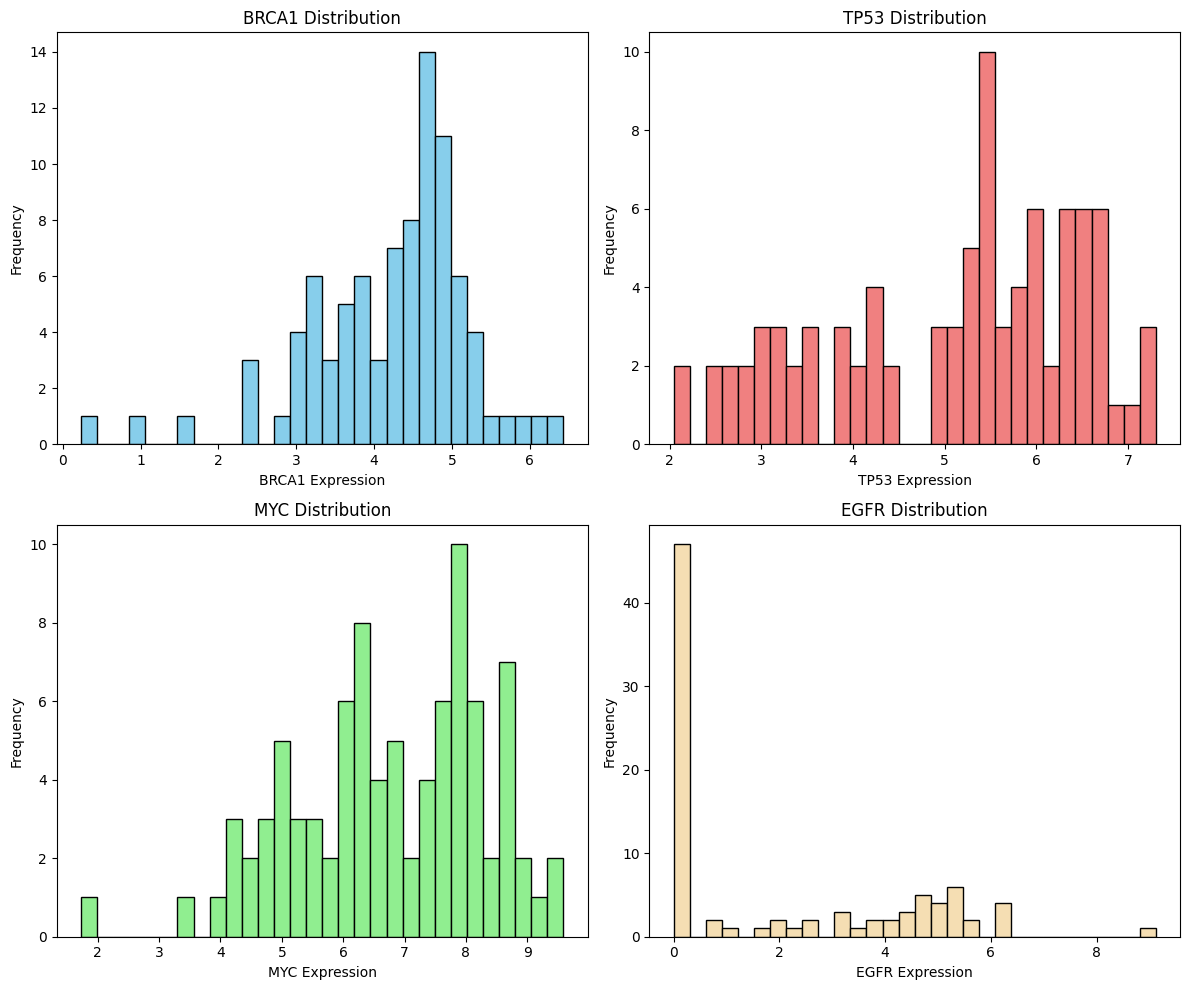

In [7]:
# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: BRCA1 (row 0, column 0)
axes[0, 0].hist(gene_df['BRCA1'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('BRCA1 Expression')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('BRCA1 Distribution')

# Top-right: TP53 (row 0, column 1)
axes[0, 1].hist(gene_df['TP53'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('TP53 Expression')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('TP53 Distribution')

# Bottom-left: MYC (row 1, column 0)
axes[1, 0].hist(gene_df['MYC'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('MYC Expression')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('MYC Distribution')

# Bottom-right: EGFR (row 1, column 1)
axes[1, 1].hist(gene_df['EGFR'], bins=30, color='wheat', edgecolor='black')
axes[1, 1].set_xlabel('EGFR Expression')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('EGFR Distribution')

plt.tight_layout()
plt.show()

**2D Indexing explained:**
- `axes[row, column]` - Use **row first, then column**
- `axes[0, 0]` = Top-left
- `axes[0, 1]` = Top-right
- `axes[1, 0]` = Bottom-left
- `axes[1, 1]` = Bottom-right

Think of it like a matrix or spreadsheet - you specify the row, then the column!

### Using a Loop to Make This Easier

Writing code for each subplot gets tedious. Let's use a loop!

In [ ]:
# Create 2x2 grid with a loop
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

genes = ['BRCA1', 'TP53', 'MYC', 'EGFR']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'wheat']

# Loop through rows and columns
for i in range(2):  # rows
    for j in range(2):  # columns
        idx = i * 2 + j  # Convert 2D position to 1D index: 0, 1, 2, 3
        
        axes[i, j].hist(gene_df[genes[idx]], bins=30, 
                       color=colors[idx], edgecolor='black')
        axes[i, j].set_xlabel(f'{genes[idx]} Expression')
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].set_title(f'{genes[idx]} Distribution')

plt.tight_layout()
plt.show()

**How the index conversion works:**
- Position (0, 0): `idx = 0*2 + 0 = 0` → BRCA1
- Position (0, 1): `idx = 0*2 + 1 = 1` → TP53
- Position (1, 0): `idx = 1*2 + 0 = 2` → MYC
- Position (1, 1): `idx = 1*2 + 1 = 3` → EGFR

The formula `i * num_cols + j` converts 2D grid position to 1D list index!

### 📊 Exercise 3: 3×2 Grid of Six Genes

Create a 3×2 grid (3 rows, 2 columns) showing histograms of these 6 genes:
BRCA1, TP53, MYC, EGFR, KRAS, AKT1

**Hints:**
- Use `plt.subplots(3, 2, figsize=(12, 15))`
- The formula for idx is: `i * 2 + j` (2 is the number of columns)
- Choose your own colors!

In [ ]:
# Your code here:


---

## 7. The Magic of `.flatten()` - Easier Looping!

There's an even **easier** way to loop through subplots: use `.flatten()` to convert the 2D axes array to 1D!

In [ ]:
# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten to 1D array for easy looping
axes_flat = axes.flatten()

genes = ['BRCA1', 'TP53', 'MYC', 'EGFR']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'wheat']

# Much simpler loop!
for idx, gene in enumerate(genes):
    axes_flat[idx].hist(gene_df[gene], bins=30, 
                       color=colors[idx], edgecolor='black')
    axes_flat[idx].set_xlabel(f'{gene} Expression')
    axes_flat[idx].set_ylabel('Frequency')
    axes_flat[idx].set_title(f'{gene} Distribution')

plt.tight_layout()
plt.show()

**Why this is better:**
- `axes.flatten()` converts 2D array to 1D: `[[ax1, ax2], [ax3, ax4]]` → `[ax1, ax2, ax3, ax4]`
- No need for nested loops or index calculations!
- Just use `enumerate()` to loop through
- Much cleaner and easier to understand

**This is the recommended approach for most subplot grids!**

### 📊 Exercise 4: Nine Genes with Flatten

Create a 3×3 grid showing density plots of these 9 genes:
BRCA1, TP53, MYC, EGFR, KRAS, AKT1, PIK3CA, PTEN, RB1

Use the `.flatten()` approach!

**Hints:**
- Create the grid: `fig, axes = plt.subplots(3, 3, figsize=(15, 15))`
- Flatten: `axes_flat = axes.flatten()`
- Loop with: `for idx, gene in enumerate(genes):`
- Use density plots instead of histograms

In [ ]:
# Your code here:


---

## 8. Advanced: Shared Axes for Better Comparison

When comparing distributions, it's often helpful to **share axes** so the scales are the same across all subplots.

### Sharing the Y-axis

Let's share the y-axis so we can directly compare frequencies:

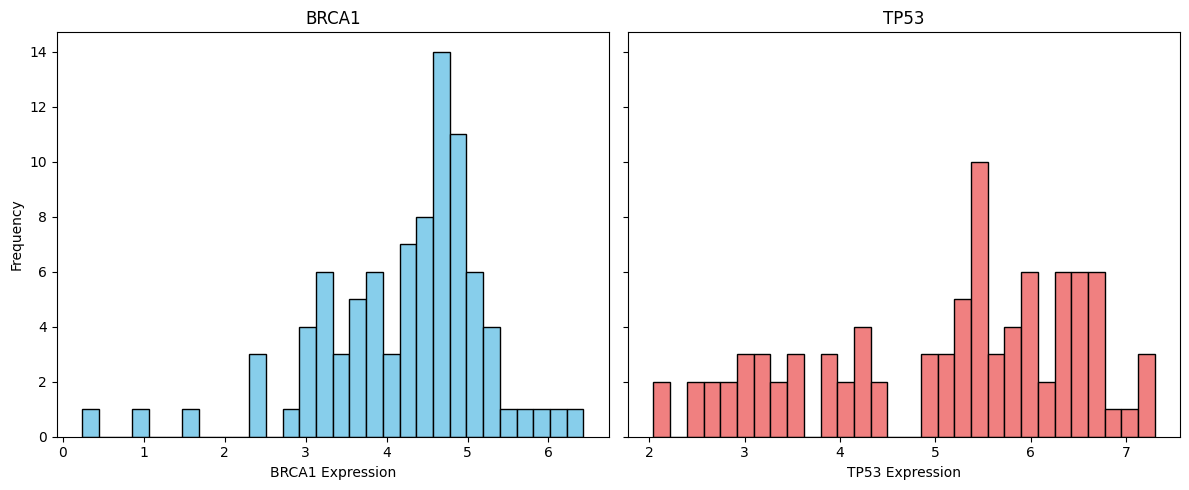

In [8]:
# Share y-axis for direct comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Left subplot
axes[0].hist(gene_df['BRCA1'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('BRCA1 Expression')
axes[0].set_ylabel('Frequency')
axes[0].set_title('BRCA1')

# Right subplot
axes[1].hist(gene_df['TP53'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('TP53 Expression')
# No ylabel needed - shared with left plot!
axes[1].set_title('TP53')

plt.tight_layout()
plt.show()

**What happened?**
- `sharey=True`: Both plots use the **same y-axis scale**
- Makes it easier to compare frequencies directly
- Only the left plot shows y-axis labels (no duplication)

**When to use shared axes:**
- When comparing similar types of data
- When you want to see relative differences clearly
- For publication-quality figures

### Sharing the X-axis

Sharing x-axes is great for stacked plots:

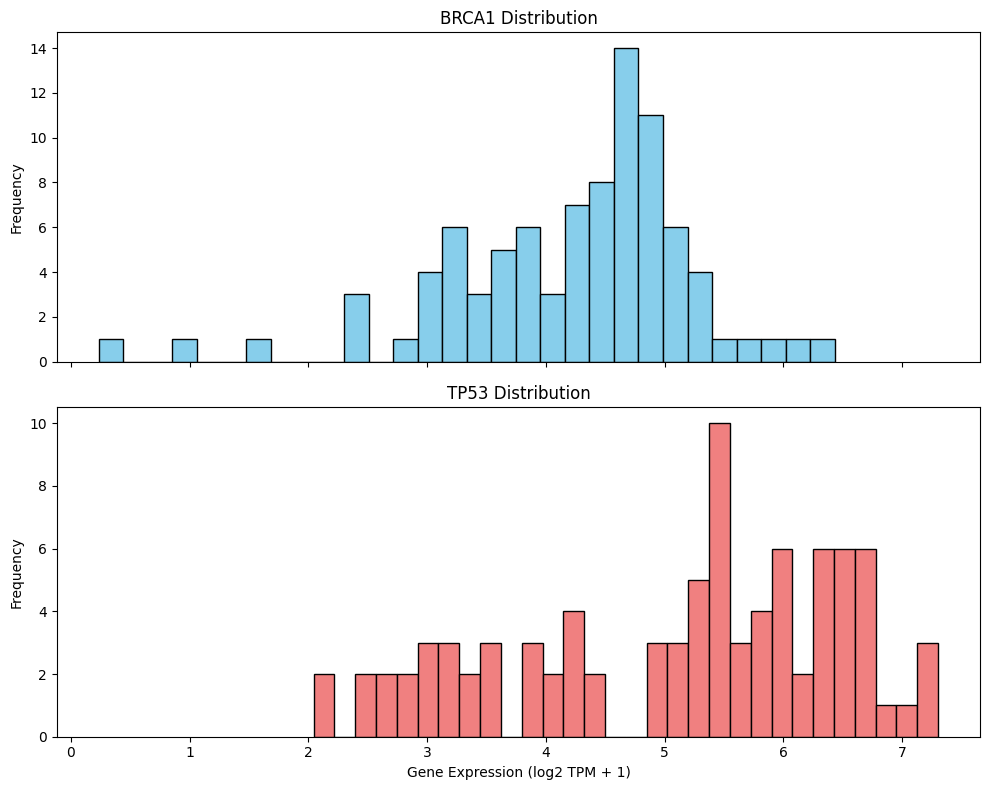

In [9]:
# Share x-axis for aligned comparison
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Top subplot
axes[0].hist(gene_df['BRCA1'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_ylabel('Frequency')
axes[0].set_title('BRCA1 Distribution')
# No xlabel on top plot - shared with bottom

# Bottom subplot
axes[1].hist(gene_df['TP53'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Gene Expression (log2 TPM + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('TP53 Distribution')

plt.tight_layout()
plt.show()

**Benefits of shared x-axis:**
- Plots are perfectly aligned vertically
- Easy to compare values across plots
- Saves space (no duplicate x-labels)

### 📊 Exercise 5: Compare Cancer Types with Shared Axes

Create 2 side-by-side histograms comparing BRCA1 expression in Breast vs Myeloid cancer cell lines. Use `sharey=True` so the frequency scales are the same.

**Hints:**
- Filter data: `breast_brca1 = gene_df[gene_df['oncotree_lineage'] == 'Breast']['BRCA1']`
- Create subplots with: `fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))`
- Plot each subset on a different axes

In [ ]:
# Your code here:


### 📊 Exercise 6: Multi-Gene Cancer Comparison

Create a 2×2 grid comparing 4 genes (BRCA1, TP53, MYC, EGFR) between Breast and Myeloid cancer types.

Each subplot should show overlaid histograms of Breast (blue) and Myeloid (orange) for that gene.

**Hints:**
- Create a 2×2 grid and flatten
- For each gene, filter data by lineage
- Use `alpha=0.5` for transparency
- Add a legend to each subplot

In [ ]:
# Your code here:


---

## 9. Subplot Quick Reference

Here's a handy reference for common subplot layouts:

### Common Layouts

```python
# Side-by-side (1 row, 2 columns)
fig, axes = plt.subplots(1, 2)

# Stacked (2 rows, 1 column)
fig, axes = plt.subplots(2, 1)

# 2×2 Grid
fig, axes = plt.subplots(2, 2)

# 3×3 Grid
fig, axes = plt.subplots(3, 3)
```

### Important Parameters

```python
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Share y-axis
fig, axes = plt.subplots(1, 2, sharey=True)

# Share x-axis
fig, axes = plt.subplots(2, 1, sharex=True)

# Flatten for easy looping
axes_flat = axes.flatten()

# Always use at the end!
plt.tight_layout()
```

---

## 10. Key Takeaways

✅ **Subplots** allow multiple plots in one figure for better comparisons

✅ **Basic syntax**: `fig, axes = plt.subplots(nrows, ncols)`
   - 1D indexing for single row/column: `axes[i]`
   - 2D indexing for grids: `axes[row, col]`

✅ **Use `.flatten()`** to simplify looping through grid layouts

✅ **Shared axes** (`sharex=True`, `sharey=True`) improve comparisons

✅ **Always use `plt.tight_layout()`** to prevent overlapping labels

✅ **Figure size matters**: Adjust `figsize` based on layout
   - Wider for side-by-side: `(12, 5)`
   - Taller for stacked: `(8, 10)`
   - Square for grids: `(12, 12)`

✅ **Publication-ready figures** often use multi-panel layouts

---

## 🎯 Challenge: Create a Publication Figure

Create a comprehensive figure comparing gene expression patterns:

1. **Top row** (2 subplots): Histograms of BRCA1 and TP53 across all cell lines
2. **Middle row** (2 subplots): Density plots comparing Breast vs Myeloid for BRCA1 and TP53
3. **Bottom row** (1 subplot spanning full width): Scatter plot of BRCA1 vs TP53 expression, colored by cancer type

*Hint: You might need to explore `plt.subplot2grid()` or `gridspec` for the spanning bottom plot!*

---

**Next:** In the next notebook, we'll learn about scatter plots and how to visualize relationships between variables! 📊